# Ciencia de datos aplicada

## Taller 5

### Contexto
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The features of this dataset are Age, Sex, Blood Pressure, and the Cholesterol of the patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe a drug to a new patient
 
https://www.kaggle.com/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

### 1. Importación de librerías y datos

En las siguientes líneas de código se importan las librerías, datos y herramientas necesarias para desarrollar el caso de uso.

In [242]:
#Librería de manejo de datos
import pandas as pd

import numpy as np

# Detección de anomálias
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Arbol de decisión y sus métricas
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import random

#Semilla para poder replicar los datos
random.seed(202120)

#Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import graphviz

#Prueba chi cuadrado
from  scipy.stats import chi2_contingency

In [64]:
#Cargar los datos
data=pd.read_csv('drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [65]:
data.shape

(200, 6)

In [66]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

### 1.1. Distribución de los datos 
La distribución muestral de una estadística es la distribución de esa estadística, considerada como una variable aleatoria, cuando se deriva de una muestra aleatoria de tamaño. Puede considerarse como la distribución de la estadística para todas las muestras posibles de la misma población de un tamaño determinado. Las distribuciones muestrales permiten que las consideraciones analíticas se basen en la distribución muestral de una estadística en lugar de en la distribución de probabilidad conjunta de todos los valores muestrales individuales.

(array([24., 53., 32., 24., 23., 11., 11.,  9.,  5.,  5.,  3.]),
 array([ 6.269     ,  9.17609091, 12.08318182, 14.99027273, 17.89736364,
        20.80445455, 23.71154545, 26.61863636, 29.52572727, 32.43281818,
        35.33990909, 38.247     ]),
 <BarContainer object of 11 artists>)

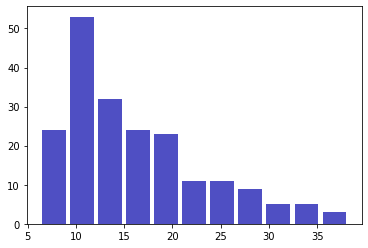

In [67]:
#Histograma de Na  a K
plt.hist(x=data['Na_to_K'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

<BarContainer object of 5 artists>

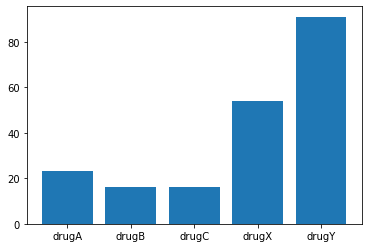

In [68]:
# Diagrama de barras de la salida
data_drug=data.groupby('Drug').count().reset_index()
plt.bar(data_drug['Drug'],data_drug['Age'])

In [ ]:
#Graficar x dato
plt.hist #Graficar las variables continuas 
plt.bar #Categóricas

### 1.2 Simulación
La definición básica de simulación de datos es tomar una gran cantidad de datos y usarlos para simular o reflejar condiciones del mundo real para predecir una instancia futura, determinar el mejor curso de acción o validar un modelo.

Hay muchas formas diferentes de simulación de datos.

Algunos buscan aproximarse a las condiciones conocidas para determinar, por ejemplo, la probabilidad de que haya recursos de petróleo, gas o minerales dentro de los estratos geológicos.

Otros toman grandes cantidades de datos y ejecutan una variedad de escenarios para ver cómo podrían funcionar los diferentes enfoques. Ves este tipo de simulación en las proyecciones climáticas. Los modeladores ejecutan diferentes escenarios basados ​​en las emisiones existentes, aumentando las emisiones y reduciendo las emisiones para estimar los niveles de temperatura décadas en el futuro.

In [314]:
random.seed(202120)
#Simular la droga
drug=[]
dict_drug={
    1:'drugA',
    2:'drugB',
    3:'drugC',
    4:'drugX',
    5:'drugY'
}
for i in range(1,2000):
    drug.append(dict_drug[random.randint(1,5)])
drug[0:3]

['drugY', 'drugA', 'drugX']

In [315]:
random.seed(202120)
#Simular la edad
age=[]
for i in range(1,2000):
    age.append(random.randint(data['Age'].min(),data['Age'].max()))
age[0:10]

[15, 43, 42, 48, 48, 69, 46, 33, 39, 51]

<BarContainer object of 3 artists>

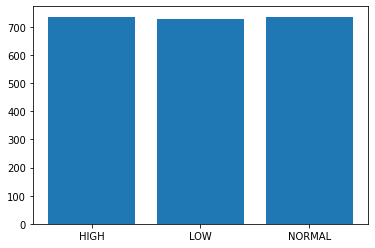

In [316]:
# Diagrama de barras de la salida
data_drug=data.groupby('BP').count().reset_index()
plt.bar(data_drug['BP'],data_drug['Sex'])

In [317]:
random.seed(202120)
#Simular el sexo droga
sex=[]
dict_sex={
    1:'F',
    2:'M'
}
for i in range(1,2000):
    sex.append(dict_sex[random.randint(1,2)])
sex[0:3]

['F', 'F', 'F']

In [115]:
random.seed(202120)
#Simular el ritmo cardiaco
bp=[]
dict_bp={
    1:'LOW',
    2:'HIGH',
    3:'NORMAL'
}
for i in range(1,2000):
    bp.append(dict_bp[random.randint(1,3)])
bp[0:3]

['HIGH', 'LOW', 'HIGH']

In [323]:
random.seed(202120)
#Simular el colesterol
ch=[]
dict_ch={
    1:'HIGH',
    2:'NORMAL'
}
for i in range(1,2000):
    ch.append(dict_ch[random.randint(1,2)])
ch[0:3]

['HIGH', 'NORMAL', 'NORMAL']

In [328]:
random.seed(202120)
#Simular Na_to_K
nk=[]
for i in range(1,2000):
    nk.append(random.expovariate(1/data['Na_to_K'].mean()))     
nk[0:10]

[0.13327300364952271,
 8.74294629236903,
 11.541925403982725,
 10.63381193072652,
 7.695358084508533,
 14.850839738222689,
 40.409619333056504,
 19.049678893727645,
 24.028261763234198,
 21.501228401245925]

In [334]:
random.seed(202120)
#Crear el dataframe
data_sim = pd.DataFrame(list(zip(age,sex,bp,ch,nk,drug)),
               columns =['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'])
data_sim.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,15,F,HIGH,HIGH,0.133273,drugY
1,43,F,LOW,NORMAL,8.742946,drugA
2,42,F,HIGH,NORMAL,11.541925,drugX
3,48,M,NORMAL,NORMAL,10.633812,drugX
4,48,F,LOW,NORMAL,7.695358,drugY


(array([295., 241., 230., 213., 153., 146., 111.,  88.,  80.,  70.,  51.,
         50.,  38.,  35.,  26.,  24.,  21.,  21.,  13.,  12.,  15.,   6.,
         13.,   7.,   7.,   1.,   5.,   4.,   5.,   1.,   2.,   5.,   1.,
          1.,   1.,   2.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          2.]),
 array([1.50617022e-02, 2.61094672e+00, 5.20683174e+00, 7.80271675e+00,
        1.03986018e+01, 1.29944868e+01, 1.55903718e+01, 1.81862568e+01,
        2.07821418e+01, 2.33780269e+01, 2.59739119e+01, 2.85697969e+01,
        3.11656819e+01, 3.37615669e+01, 3.63574519e+01, 3.89533370e+01,
        4.15492220e+01, 4.41451070e+01, 4.67409920e+01, 4.93368770e+01,
        5.19327620e+01, 5.45286470e+01, 5.71245321e+01, 5.97204171e+01,
        6.23163021e+01, 6.49121871e+01, 6.75080721e+01, 7.01039571e+01,
        7.26998422e+01, 7.52957272e+01, 7.78916122e+01, 8.04874972e+01,
        8.30833822e+01, 8.56792672e+01, 8.82751523e+01, 9.08710373e+01,
        9.34669223e+01, 9.60628073e+01, 

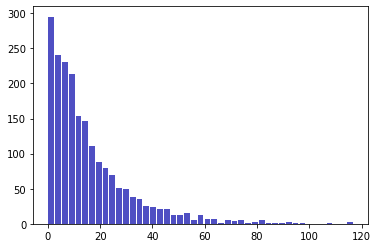

In [119]:
#Histograma de Na  a K
plt.hist(x=data_sim['Na_to_K'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [120]:
#Unir los dataset
data=pd.concat([data,data_sim]).reset_index()
data.shape

(2199, 7)

In [125]:
#Introducir ruido
for i in range(0,200):
    data.at[random.randint(0,len(data)),'Na_to_K']=np.nan

In [123]:
data.at[0,'Sex']

'F'

In [126]:
data.isna().sum()

index            0
Age              0
Sex              0
BP               0
Cholesterol      0
Na_to_K        191
Drug             0
dtype: int64

(array([261., 193., 208., 225., 173., 157., 130., 106.,  77.,  66.,  69.,
         45.,  47.,  33.,  38.,  24.,  18.,  17.,  15.,  18.,  11.,   7.,
         12.,   8.,   8.,   5.,   5.,   1.,   6.,   5.,   3.,   1.,   1.,
          5.,   1.,   1.,   0.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   2.]),
 array([1.50617022e-02, 2.44870391e+00, 4.88234611e+00, 7.31598831e+00,
        9.74963051e+00, 1.21832727e+01, 1.46169149e+01, 1.70505571e+01,
        1.94841993e+01, 2.19178415e+01, 2.43514837e+01, 2.67851259e+01,
        2.92187681e+01, 3.16524103e+01, 3.40860525e+01, 3.65196947e+01,
        3.89533370e+01, 4.13869792e+01, 4.38206214e+01, 4.62542636e+01,
        4.86879058e+01, 5.11215480e+01, 5.35551902e+01, 5.59888324e+01,
        5.84224746e+01, 6.08561168e+01, 6.32897590e+01, 6.57234012e+01,
        6.81570434e+01, 7.05906856e+01, 7.30243278e+01, 7.54579700e+01,
        7.78916122e+01, 8.03252544e+01, 8.27588966e+01, 8.51925388e+01,
        8.76261810e+01

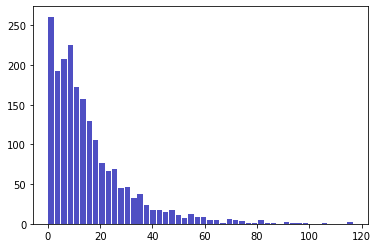

In [127]:
#Histograma de Na  a K
plt.hist(x=data['Na_to_K'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

In [129]:
data['Na_to_K'].mean()

15.843421911676119

In [130]:
#Imputación de datos
data=data.fillna(data['Na_to_K'].mean())
data

,index,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355000,drugY
1,1,47,M,LOW,HIGH,13.093000,drugC
2,2,47,M,LOW,HIGH,10.114000,drugC
3,3,28,F,NORMAL,HIGH,7.798000,drugX
4,4,61,F,LOW,HIGH,18.043000,drugY
...,...,...,...,...,...,...,...
2194,1994,47,F,NORMAL,NORMAL,9.496631,drugB
2195,1995,64,F,HIGH,HIGH,25.799268,drugC
2196,1996,69,M,LOW,HIGH,4.228428,drugC
2197,1997,39,M,LOW,NORMAL,9.429915,drugC


In [131]:
data['Na_to_K'].mean()

15.843421911676044

In [132]:
data.isna().sum()

index          0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

### 2. Isolation Forest
Dos de las principales implementaciones de Isolation Forest están disponibles en Scikit Learn. Si bien las dos están muy optimizadas, existen pequeñas diferencias a la hora de utilizarlas.

En la implementación de Scikit Learn, al entrenar el modelo, se tiene que especificar el porcentaje de anomalías que se espera en los datos de entrenamiento (contamination). Con este valor, el modelo aprende el valor a partir del cual una observación se considera anomalía. Al aplicar el método predict() se obtiene -1 si es anomalía (outlier) o 1 si es un dato normal (inliers). Para recuperar la métrica de anomalía en lugar de la clasificación, hay que emplear el método score_samples(). Este último devuelve el valor negativo de la distancia de aislamiento, normalizada tal como se propone en el paper original.

In [160]:
#Preparación de los datos
data_X = pd.get_dummies(pd.DataFrame(data))
data_X

,index,Age,Na_to_K,atipico,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY
0,0,23,25.355000,1,1,0,1,0,0,1,0,0,0,0,0,1
1,1,47,13.093000,1,0,1,0,1,0,1,0,0,0,1,0,0
2,2,47,10.114000,1,0,1,0,1,0,1,0,0,0,1,0,0
3,3,28,7.798000,1,1,0,0,0,1,1,0,0,0,0,1,0
4,4,61,18.043000,1,1,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,1994,47,9.496631,1,1,0,0,0,1,0,1,0,1,0,0,0
2195,1995,64,25.799268,1,1,0,1,0,0,1,0,0,0,1,0,0
2196,1996,69,4.228428,1,0,1,0,1,0,1,0,0,0,1,0,0
2197,1997,39,9.429915,1,0,1,0,1,0,0,1,0,0,1,0,0


In [161]:
# Definición y entrenamiento del modelo IsolationForest
modelo_isof = IsolationForest(
                n_estimators  = 1000,
                max_samples   ='auto',
                contamination = 0.01,
                n_jobs        = -1,
                random_state  = 123,
            )

In [162]:
modelo_isof.fit(X=data_X)

/home/davidsaw/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


IsolationForest(contamination=0.01, n_estimators=1000, n_jobs=-1,
                random_state=123)

In [163]:
# Predicción clasificación
clasificacion_predicha = modelo_isof.predict(X=data_X)
clasificacion_predicha[0:10]

/home/davidsaw/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [164]:
(len(data)-sum(clasificacion_predicha))/2

22.0

Con el método score_samples(), en lugar de la clasificación, se obtiene el valor de anomalía predicho por el modelo. Es importante destacar que este valor no es la distancia de aislamiento promedio, sino una normalización de la misma propuesta en el paper original.

Como resultado de la normalización, y de multiplicarla por -1, los valores de anomalía quedan acotados en el rango [-1, 0]. Cuanto más próximo a -1 es el valor, mayor evidencia de anomalía. Valores entre -0.5 y 0 son los esperados para observaciones normales.

In [165]:
# Predicción valor anomalía
score_anomalia = modelo_isof.score_samples(X=data_X)
score_anomalia[0:10]

array([-0.55438161, -0.53352951, -0.53466247, -0.54272197, -0.53947931,
       -0.54796232, -0.53225214, -0.53645186, -0.53638248, -0.5253274 ])

/home/davidsaw/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/davidsaw/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


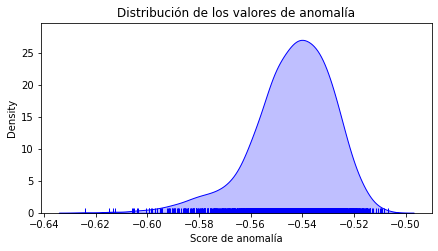

In [166]:
#Gráfico
# Distribución de los valores de anomalía
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
sns.distplot(
    score_anomalia,
    hist    = False,
    rug     = True,
    color   = 'blue',
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = ax
)

# ax.axvline(cuantil_01, c='red', linestyle='--', label='cuantil 0.01')
ax.set_title('Distribución de los valores de anomalía')
ax.set_xlabel('Score de anomalía');

In [167]:
data['atipico']=clasificacion_predicha

# 3. Test chi cuadrado
La prueba de chi-cuadrado es un método de prueba de hipótesis ampliamente utilizado para contar datos. Pertenece a la categoría de pruebas no paramétricas y compara principalmente dos o más frecuencias de muestreo (proporciones de composición) y el análisis de correlación de dos variables categóricas. La idea básica es comparar el grado de ajuste o la bondad del ajuste entre la frecuencia teórica y la frecuencia real.

La idea básica de la prueba de chi-cuadrado:

La prueba de chi-cuadrado es $\chi^2$ Un método de prueba de hipótesis común basado en la distribución.
Su hipótesis básica H0 es: no hay diferencia entre la frecuencia observada y la frecuencia esperada.

La idea básica de la prueba es: primero suponga que H0 se cumple y calcule según esta premisa $\chi^2$ Valor, que indica el grado de desviación entre el valor observado y el valor teórico. De acuerdo a $\chi^2$ La distribución y los grados de libertad determinan la probabilidad P de que se obtengan las estadísticas actuales y los casos más extremos cuando se cumple la hipótesis H0. Si el valor P es pequeño, indica que el valor observado se desvía demasiado del valor teórico, y la hipótesis nula debe rechazarse, lo que indica que existe una diferencia significativa entre los datos de comparación; de lo contrario, la hipótesis no válida no puede rechazarse, y la situación real y los supuestos teóricos representados por la muestra no pueden considerarse Hay diferencias

#### 3.1 Ejercicio con los datos

$H_0:$ No existe relación sobre las variables categóricas en la población

$H_1:$ **Existe** relación sobre las variables categóricas en la población


In [172]:
#Incluir crosstab
data_grupos=pd.crosstab(data['Drug'], data['Cholesterol'])
data_grupos

Cholesterol,HIGH,NORMAL
Drug,,
drugA,223,186
drugB,219,212
drugC,200,210
drugX,207,246
drugY,245,251


In [173]:
#Prueba Chi
kf = chi2_contingency(data_grupos)
kf

(7.080128490276944, 0.1317139066683917, 4, array([[203.47703502, 205.52296498],
        [214.42201   , 216.57799   ],
        [203.97453388, 206.02546612],
        [225.36698499, 227.63301501],
        [246.75943611, 249.24056389]]))

In [174]:
print('chisq-statistic=%.4f, p-value=%.4f, df=%i expected_frep=%s'%kf)

chisq-statistic=7.0801, p-value=0.1317, df=4 expected_frep=[[203.47703502 205.52296498]
 [214.42201    216.57799   ]
 [203.97453388 206.02546612]
 [225.36698499 227.63301501]
 [246.75943611 249.24056389]]


Conclusión: Debido a que el valor p > 0.05, aceptamos la hipótesis nula y creemos que no hay una diferencia significativa en los grupos

### 4. Árbol de decisión
Es uno de los algoritmos más potentes y populares. El algoritmo de árbol de decisiones se incluye en la categoría de algoritmos de aprendizaje supervisado. Funciona tanto para variables de salida continuas como categóricas.

#### Gini
El índice de Gini es una métrica para medir la frecuencia con la que un elemento elegido al azar se identificaría incorrectamente.
Significa que se debe preferir un atributo con un índice de gini más bajo.
Sklearn admite los criterios "gini" para el índice Gini y, de forma predeterminada, toma el valor "gini".

#### Entropía
La entropía es la medida de la incertidumbre de una variable aleatoria, caracteriza la impureza de una colección arbitraria de ejemplos. Cuanto mayor sea la entropía, mayor será el contenido de información.
Ganancia de información
La entropía generalmente cambia cuando usamos un nodo en un árbol de decisión para dividir las instancias de entrenamiento en subconjuntos más pequeños. La ganancia de información es una medida de este cambio en la entropía.
Sklearn admite criterios de "entropía" para la ganancia de información y si queremos utilizar el método de ganancia de información en sklearn, debemos mencionarlo explícitamente.

#### Métricas
La puntuación de precisión(accuracy) se utiliza para calcular la precisión del clasificador entrenado.
Matriz de confusión

Matriz de confusión se utiliza para comprender el comportamiento del clasificador entrenado sobre el conjunto de datos de prueba o validar el conjunto de datos.


In [230]:
#Separamos los datos en predictoras y predichas
X = pd.get_dummies(data[['Na_to_K','Sex','Drug']].drop('Drug',axis=1))
Y = data['Drug']

In [231]:
X

,Na_to_K,Sex_F,Sex_M
0,25.355000,1,0
1,13.093000,0,1
2,10.114000,0,1
3,7.798000,1,0
4,18.043000,1,0
...,...,...,...
2194,9.496631,1,0
2195,25.799268,1,0
2196,4.228428,0,1
2197,9.429915,0,1


In [232]:
# Realizamos la base de prueba
X_train, X_test, y_train, y_test = train_test_split( 
          X, Y, test_size = 0.3, random_state = 100)

In [233]:
# Creamos el árbol de decisión con el criterio gini
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [234]:
# Creamos el árbol de decisión con el criterio de entropía
clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

In [235]:
# Ajustamos los modelos
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [236]:
# Realizamos una función para la predicción
def pred(X_test, clf):
    # Predicton on test with giniIndex
    y_pred = clf.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [237]:
pred(X_test,clf_entropy)[0:1]

Predicted values:
['drugX' 'drugY' 'drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugX'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugX' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugX' 'drugY' 'drugY' 'drugC' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugY' 'drugX' 'drugX' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugY' 'drugC'
 'drugC' 'drugY' 'drugX' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugY' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY'
 'drugX' 'drugX' 'drugY' 'drugC' 'drugX' 'drugX' 'drugC' 'drugX' 'drugX'
 'drugX' 'drugY' 'drugC' 'drugY' 'drugX' 'drugX' 'drugC' 'drugX' 'drugX'
 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugC' 'drugX' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugY' 

array(['drugX'], dtype=object)

In [238]:
# Función para calcular las métricas
def metricas(y_test, y_pred):
    print("Matriz de confusión: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Precisión : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Reporte : ",
    classification_report(y_test, y_pred))

In [239]:
#Realizar las comparaciones
metricas(y_test,pred(X_test,clf_entropy))

Predicted values:
['drugX' 'drugY' 'drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugX'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugX' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugX' 'drugY' 'drugY' 'drugC' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugY' 'drugX' 'drugX' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY'
 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugY' 'drugC'
 'drugC' 'drugY' 'drugX' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugY' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugX' 'drugY'
 'drugX' 'drugX' 'drugY' 'drugC' 'drugX' 'drugX' 'drugC' 'drugX' 'drugX'
 'drugX' 'drugY' 'drugC' 'drugY' 'drugX' 'drugX' 'drugC' 'drugX' 'drugX'
 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugC' 'drugX' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugY' 'drugY' 

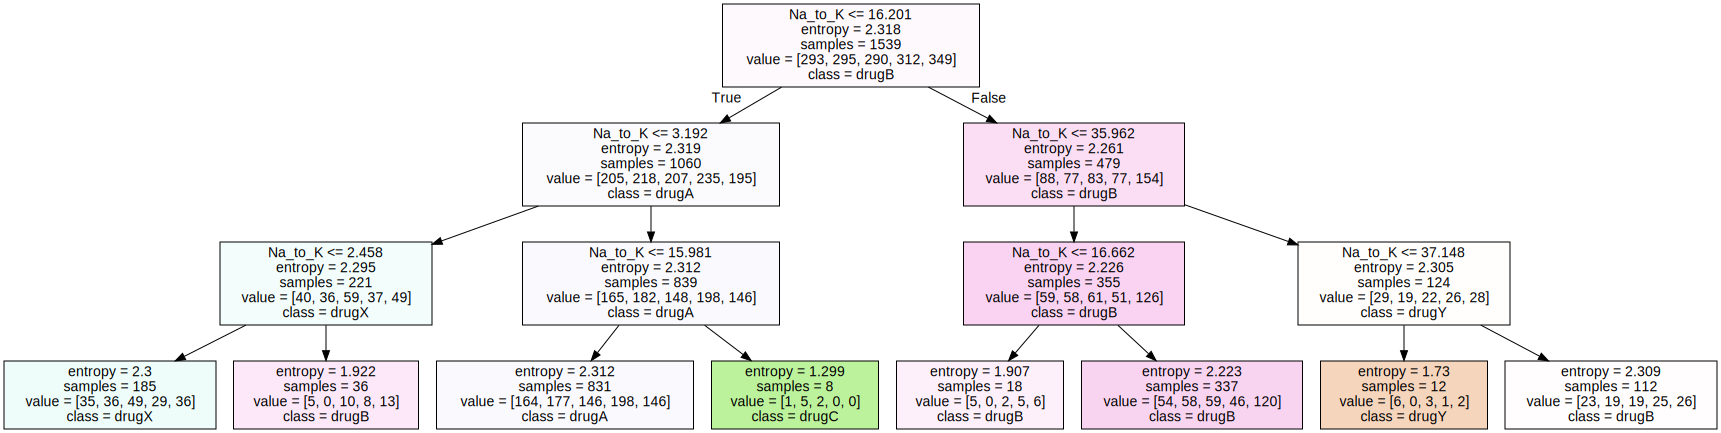

In [240]:
# Crear gráfico
dot_data = tree.export_graphviz(clf_entropy, out_file=None, 
                                feature_names=X.columns,  
                                class_names=data['Drug'].unique(),
                                filled=True)
# Mostrar el gráfico
graph = graphviz.Source(dot_data, format="png") 
graph

### 5. Curva ROC
Las curvas ROC suelen presentar una tasa de verdaderos positivos en el eje Y y una tasa de falsos positivos en el eje X. Esto significa que la esquina superior izquierda de la gráfica es el punto "ideal": una tasa de falsos positivos de cero y una tasa de verdaderos positivos de uno. Esto no es muy realista, pero significa que un área más grande bajo la curva (AUC) suele ser mejor.

La "inclinación" de las curvas ROC también es importante, ya que es ideal para maximizar la tasa de verdaderos positivos mientras se minimiza la tasa de falsos positivos.

Las curvas ROC se utilizan normalmente en la clasificación binaria para estudiar la salida de un clasificador. Para extender la curva ROC y el área ROC a la clasificación de etiquetas múltiples, es necesario binarizar la salida. Se puede dibujar una curva ROC por etiqueta, pero también se puede dibujar una curva ROC considerando cada elemento de la matriz del indicador de etiqueta como una predicción binaria (micropromedio).


In [202]:
# Binarize the output
y = label_binarize(Y, classes=['drugA', 'drugB','drugC' ,'drugX', 'drugY'])
n_classes = y.shape[1]

In [203]:
y[0:10]

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]])

In [204]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.predict_proba(X_test)

    # estructura de datos
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calcular los dummies
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc para cada clase
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

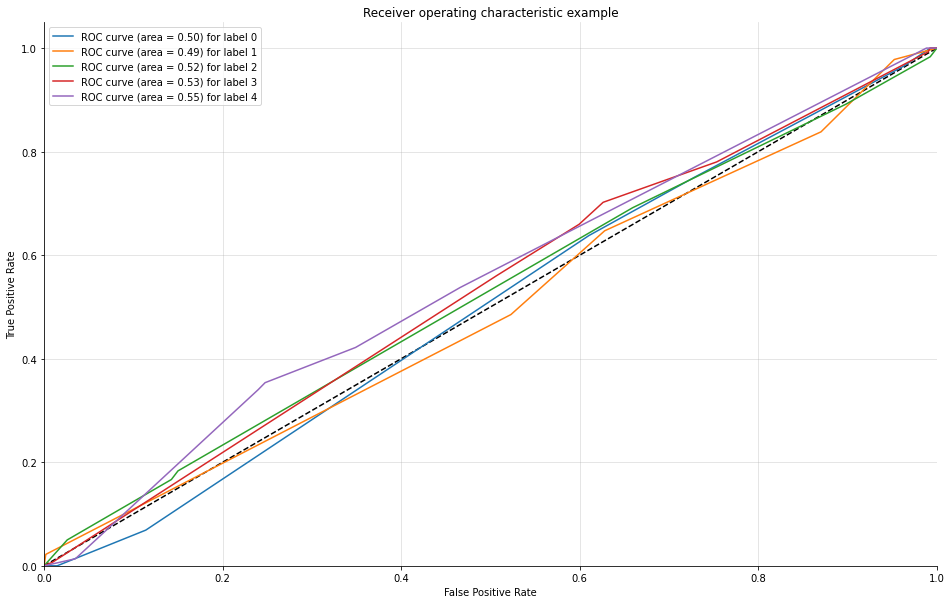

In [241]:
plot_multiclass_roc(clf_entropy, X_test, y_test, n_classes=5, figsize=(16, 10))

### Extensión
1. Realice el analisis de outliers con la edad
2. Realice la prueba chi con menos variables
3. Cambie las variables del clasificador para obtener mejor ajuste
4. Si es necesario eliminar variables
5. Crear una simulación diferente que sea similar a los gráficos originales(diferente a la vista en el notebook de ser posible), utilizar el comando _random.seed(202120)_ en el bloque de aleatoriedad
6. Hacer el test chi para todas las variables categóricas
7. Crear a través de gridsearch el mejor modelo(con métricas buenas), utilizando también los puntos anteriores
 